In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols

In [3]:
df_tips = sns.load_dataset('tips')

In [4]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df_boston = pd.read_csv('Boston.csv',index_col = 0)

In [6]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df_boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

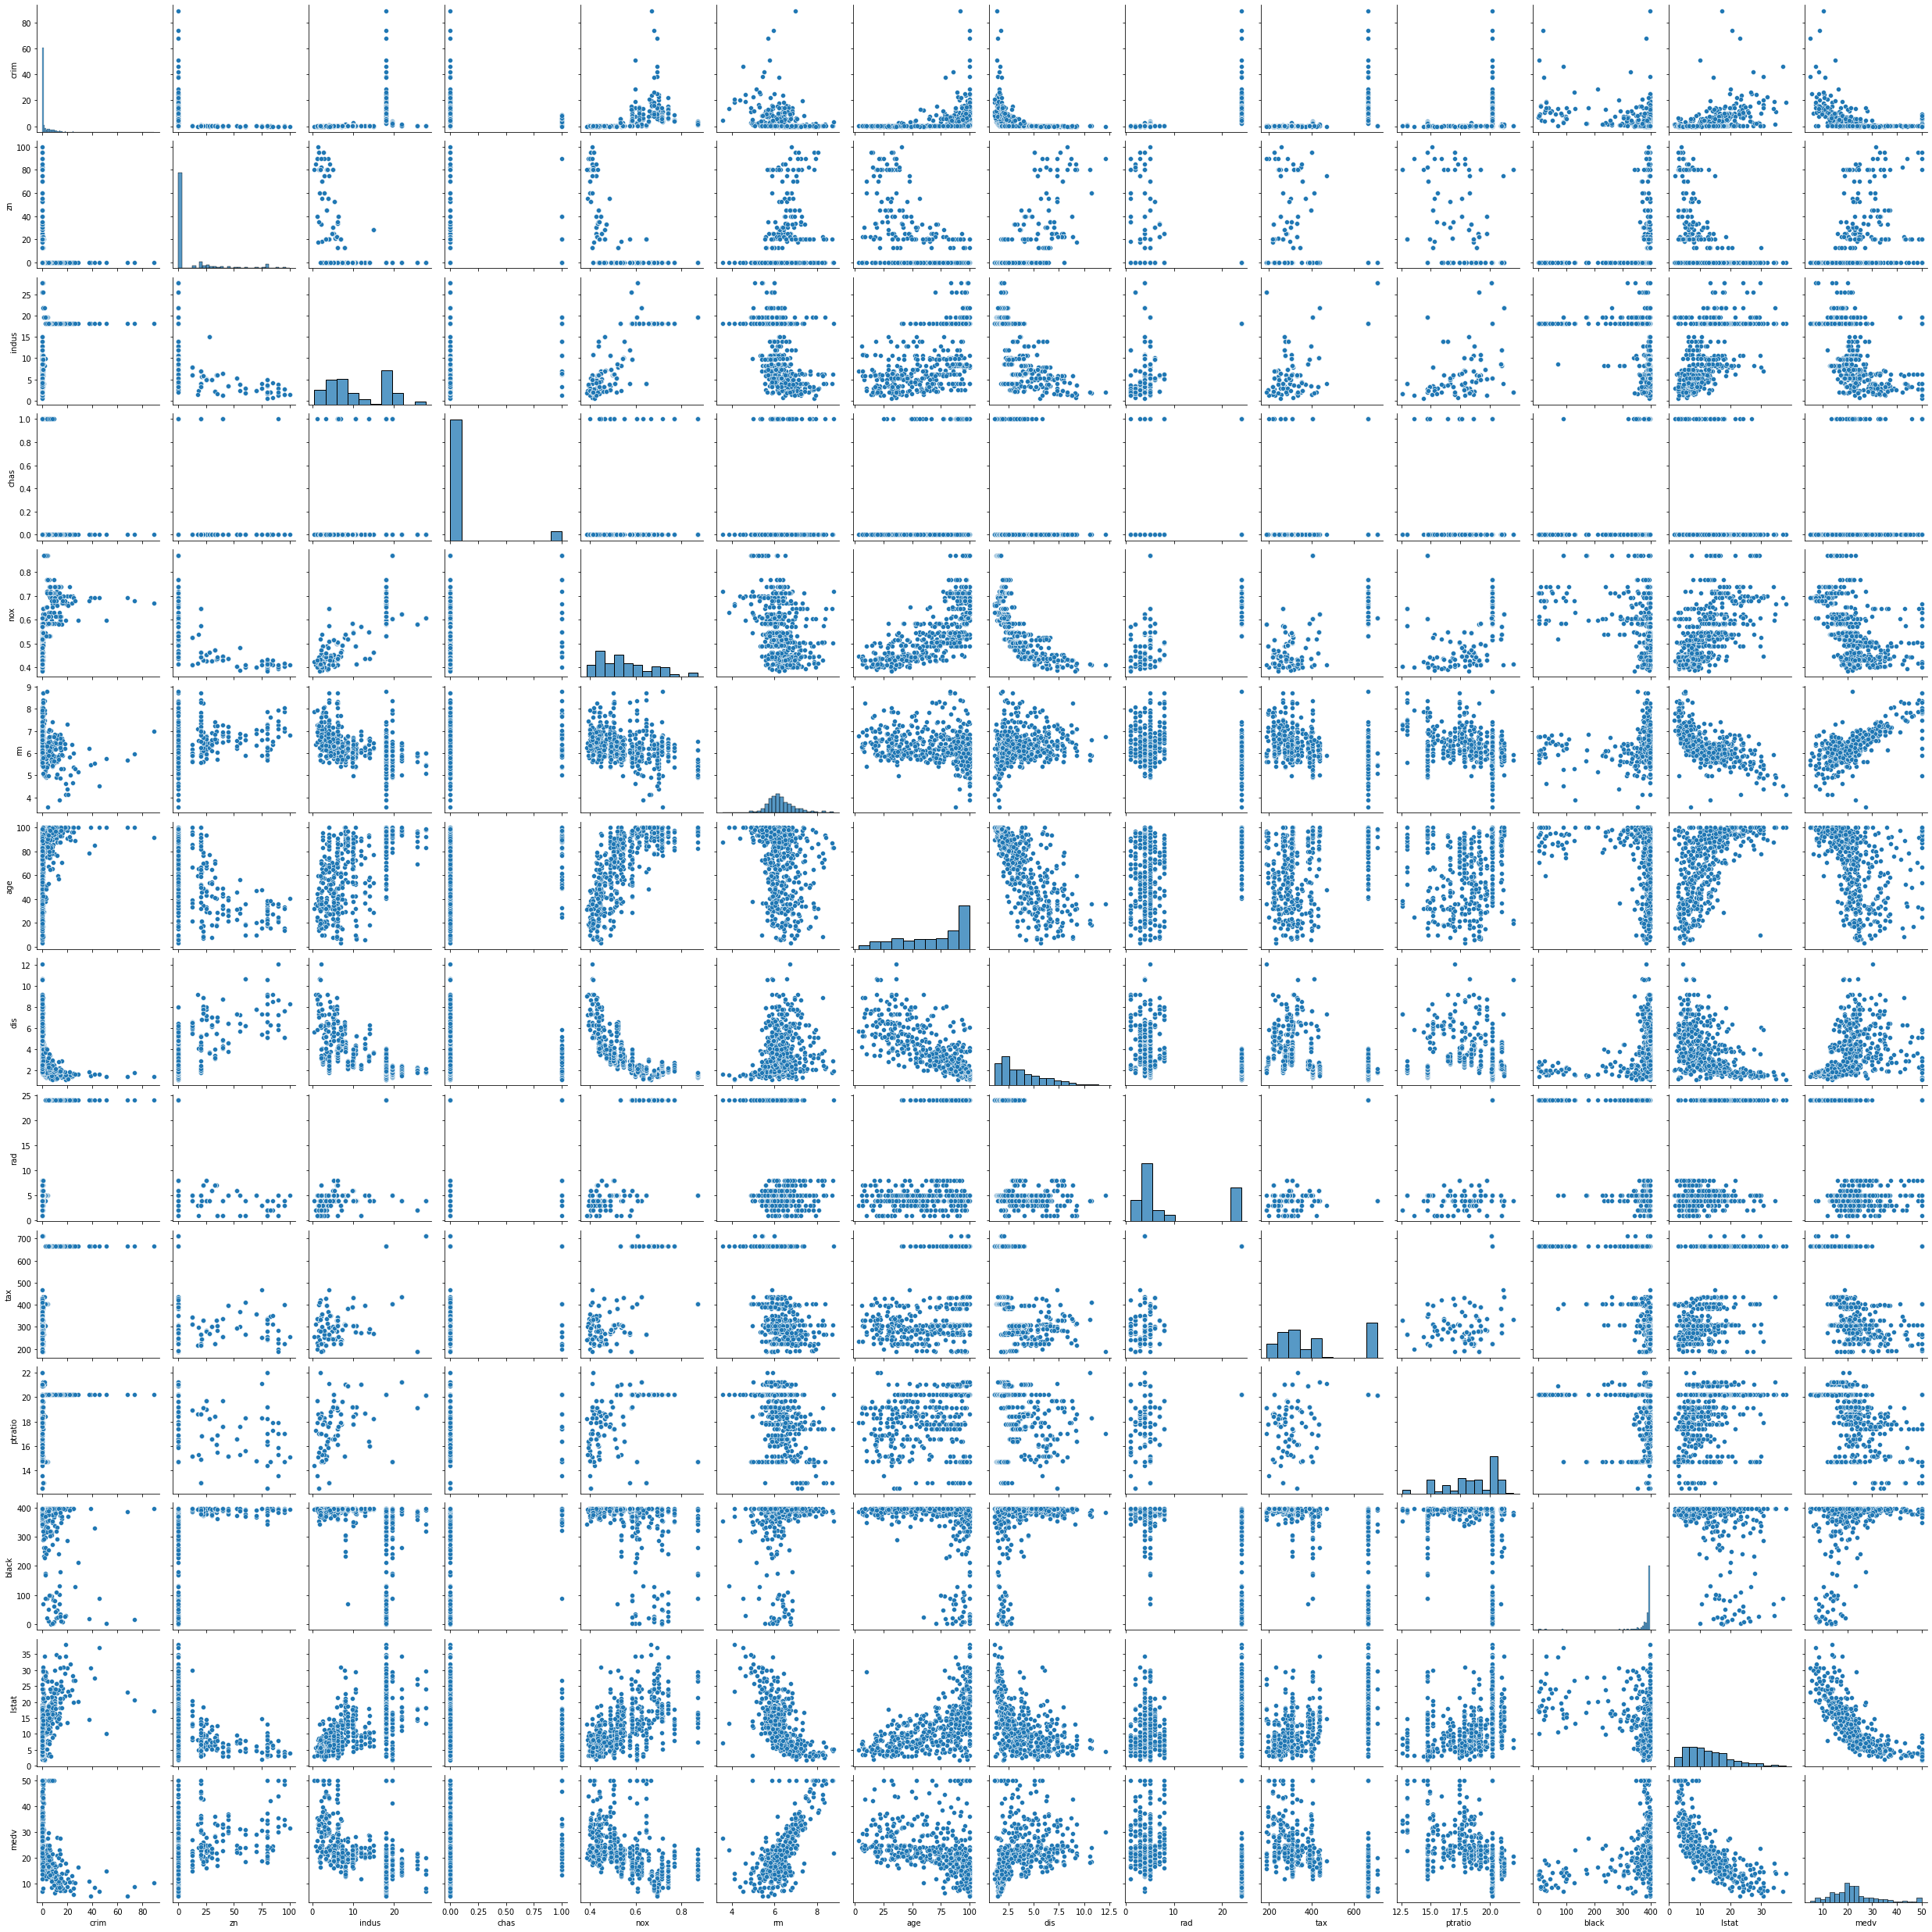

In [8]:
sns.pairplot(df_boston)

In [9]:
df_boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

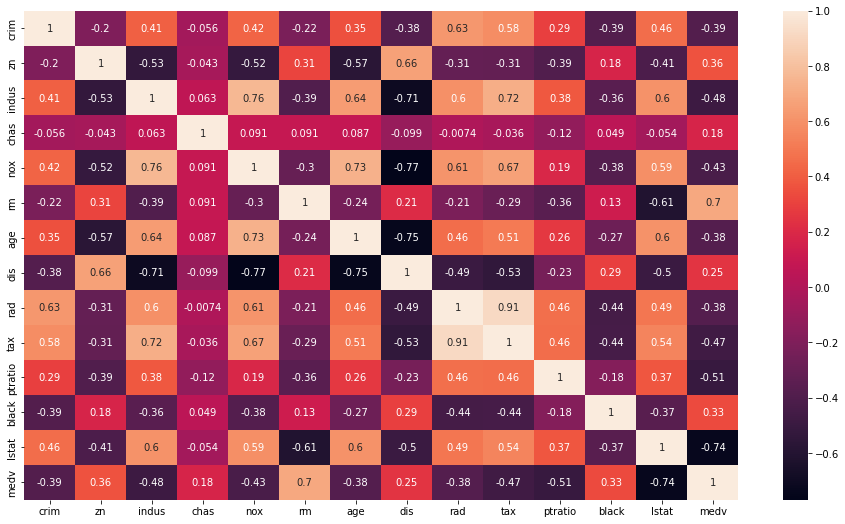

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df_boston.corr(),annot = True)

# Simple linear regression

In [11]:
x = df_boston.iloc[:,[12]]

In [12]:
y = df_boston.iloc[:,13]

In [13]:
type(x)

pandas.core.frame.DataFrame

#### Random sampling

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

In [15]:
model = LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

In [17]:
model.coef_

array([-0.96844635])

In [18]:
pred = model.predict(x_test)

In [19]:
pred

array([25.35932274, 14.42556342, 27.00568154, 25.6111188 , 23.69359502,
       17.49553836, 23.65485716, 31.96412687, 11.76233595,  7.58833217,
       23.83886197, 22.58956617, 31.15063194, 18.25092651, 19.0256836 ,
       26.31808463, 17.47616943, 27.21873974, 18.57051381, 18.24124205,
       27.18000189, 22.38619244, 25.76607021, 19.14189716, 19.78107175,
       22.93820686, 12.37245715, 21.96007605, 29.89165168, 31.51864155,
       21.09815879, 23.88728429, 30.9472582 , 19.27747965, 25.32058489,
       18.41556239, 20.84636274, 30.15313219, 27.34463777, 25.77575468,
       25.1850024 , 20.77857149, 25.80480807, 20.09097458, 28.46803554,
       26.16313322, 31.33463674, 12.61456874, 22.34745459, 26.18250214,
       29.86259829, 32.18686953, 16.56582986, 29.93038953, 26.22124   ,
       12.46930179, 25.54332755, 27.81917648, 16.80794145, 17.62143638,
       28.70046266, 28.9038364 , 11.35558848, 21.27247913, 20.07160566,
       27.68359399, 23.99381339, 15.17126711, 28.60361803, 21.06

In [20]:
r2_score(y_test,pred)

0.49575368629907113

In [21]:
num1 = np.sum((np.array(y_test) - np.array(pred))**2)
den1 = np.sum((np.array(y_test) - np.mean(y_test))**2)

In [22]:
r2_sq = num1/den1

In [23]:
r2_sq

0.5042463137009289

In [24]:
np.corrcoef(y_test,pred)**2

array([[1.        , 0.51687218],
       [0.51687218, 1.        ]])

# Multiple Linear Regression

In [25]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
x = df_boston.drop('medv',axis = 1)

In [27]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [28]:
y = df_boston.iloc[:,13]

In [29]:
y.head()

1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: medv, dtype: float64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 100)

In [31]:
model_mlr = LinearRegression().fit(x_train,y_train)

In [32]:
pred = model_mlr.predict(x_test)

In [33]:
r2_score(y_test,pred)

0.7555033086871299

In [34]:
# slope
model_mlr.coef_

array([-8.14896492e-02,  4.80407782e-02, -5.47150249e-03,  3.06260576e+00,
       -1.61368815e+01,  3.67245067e+00, -8.51525259e-03, -1.51740854e+00,
        2.87271007e-01, -1.21207598e-02, -9.24160757e-01,  9.53460812e-03,
       -4.85895548e-01])

In [35]:
# c
model_mlr.intercept_

36.33377028550785

# OLS Regression

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=100)

In [37]:
df_train,df_test = train_test_split(df_boston,train_size = 0.8, random_state = 100)

df_train = pd.concat([x_train,y_train])

In [38]:
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
312,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.98,22.1
158,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
245,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,7,330,19.1,372.49,12.50,17.6
57,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7


In [39]:
df_train.shape

(404, 14)

In [40]:
x_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
199,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62
230,0.44178,0.0,6.20,0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
32,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04
316,0.25356,0.0,9.90,0,0.544,5.705,77.7,3.9450,4,304,18.4,396.42,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70
402,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
369,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26
141,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437,21.2,388.08,24.16


In [41]:
df_boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [42]:
model_ols = ols('medv~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat',data = df_boston).fit()

In [43]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        10:54:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
pred = model_ols.predict(df_test)

In [45]:
r2_score(df_test.iloc[:,[13]],pred)

0.7694100605990848

In [46]:
model_new = ols('medv ~ lstat+rm',data = df_boston).fit()

In [47]:
pred = model_new.predict(df_test)

In [48]:
r2_score(df_test.iloc[:,[13]],pred)

0.6733053329043162

In [49]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          7.01e-112
Time:                        10:54:35   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
lstat         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
rm             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='medv', ylabel='lstat'>

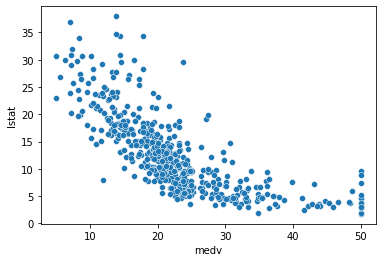

In [50]:
sns.scatterplot(x = df_boston['medv'],y = df_boston['lstat'])

In [51]:
pred = model_new.fittedvalues

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
x = df_boston.iloc[:,0:13]

In [54]:
x.shape

(506, 13)

In [55]:
vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))

In [56]:
vif

[2.1003728199615233,
 2.8440132669462628,
 14.485757706539308,
 1.1529518589418777,
 73.89494652814788,
 77.94828304638538,
 21.38685048994314,
 14.6996523837492,
 15.167724857920897,
 61.227274009649456,
 85.02954731061801,
 20.104942636229136,
 11.102024772203526]

calculating fstat
MSR/MSE

In [62]:
MSR = np.sum((np.array(model_ols.fittedvalues) - np.mean(df_train['medv']))**2)/13
MSE = np.sum((model_ols).resid**2)/(df_train.shape[0]-13-1)
F_stat = MSR/MSE

- Standard errors assume that the covariance matrix of the errors is correctly specified
- The condition number is large,1.55+e024 This might indicare there is strong multicollinearity or other numerical problems

In [63]:
F_stat

85.68119511918185

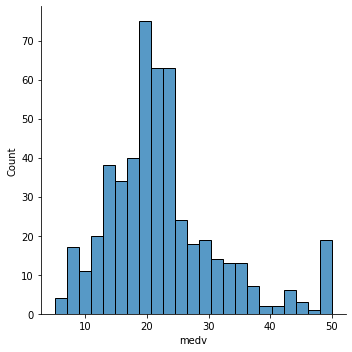

In [65]:
sns.displot(df_boston['medv'])

In [66]:
df_boston.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
black     -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

In [67]:
df_boston['log_medv'] = np.log(df_boston['medv'])

<AxesSubplot:xlabel='log_medv', ylabel='Count'>

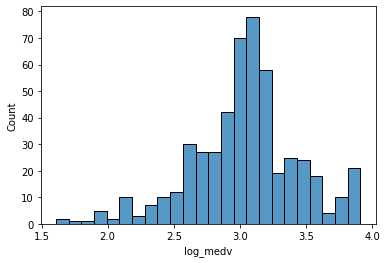

In [68]:
sns.histplot(df_boston['log_medv'])

In [69]:
x = df_boston.iloc[:,0:13]

In [70]:
y = df_boston.iloc[:,14]

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

In [72]:
model_newer = LinearRegression().fit(x_train,y_train)

In [73]:
pred_new = model_newer.predict(x_test)

In [74]:
model_newer.coef_

array([-1.14967501e-02,  1.19281501e-03,  2.73377912e-03,  1.09346486e-01,
       -7.92596871e-01,  8.49179641e-02,  2.62520488e-04, -5.33479424e-02,
        1.61201270e-02, -6.94312156e-04, -3.64079827e-02,  3.35995623e-04,
       -3.07747650e-02])

In [75]:
r2_score(y_test,pred_new)

0.8033800237124521

In [78]:
p_org = np.exp(pred_new)

In [79]:
p_org

array([17.24368628, 28.80447387,  9.18265294, 13.91126922, 16.34370777,
       16.69670519, 16.31247156, 10.8727286 , 33.55497052, 34.67629703,
       27.7481498 , 14.7089681 , 27.7526197 , 31.52918643, 35.49726056,
       29.96043585, 19.69633289, 17.49938847, 27.39786839, 31.03565502,
       23.3269169 , 14.1184046 , 13.33185873, 16.42563562, 25.62950172,
       11.79290494, 32.02770584, 26.99912388,  8.11175154, 23.60351641,
        9.04071981, 44.23001535,  8.30359262, 20.17647227, 34.53358949,
       21.33210597, 31.30259019, 23.19062297, 35.71687669, 22.71051851,
        7.53954149, 17.79231886, 17.27182478, 13.44615155, 30.06848965,
       20.87537113, 20.58987927, 28.23771858, 22.99335939, 17.20192577,
       14.09418142, 24.30149142, 22.70821337, 23.22947248, 31.0088531 ,
       21.89121104, 17.81620229, 20.94980075, 19.50531426, 21.24069603,
       14.59693607, 24.16382231, 20.37285901, 15.19419342, 24.00466389,
       25.00205228, 22.36708881, 26.5391649 , 25.38352227, 22.42

Linear regression after transformation

In [85]:
df_boston.columns[df_boston.kurtosis()>3]

Index(['crim', 'zn', 'chas', 'black'], dtype='object')

In [92]:
df_boston_skew = df_boston.skew()

In [95]:
col = df_boston_skew[(df_boston.skew()>1.0) | (df_boston.skew() < -1.0)].index

In [96]:
col

Index(['crim', 'zn', 'chas', 'dis', 'rad', 'black', 'medv'], dtype='object')

In [97]:
df_skewed = df_boston[col]

In [98]:
df_skewed.head()

,crim,zn,chas,dis,rad,black,medv
1,0.00632,18.0,0,4.0900,1,396.90,24.0
2,0.02731,0.0,0,4.9671,2,396.90,21.6
3,0.02729,0.0,0,4.9671,2,392.83,34.7
4,0.03237,0.0,0,6.0622,3,394.63,33.4
5,0.06905,0.0,0,6.0622,3,396.90,36.2


In [104]:
df_skewed.columns[(df_skewed==0).any()]

Index(['zn', 'chas'], dtype='object')

In [102]:
# df_skewed[df_skewed['zn'] == 0]['zn'] = 1.0

In [101]:
df_skewed.head()

,crim,zn,chas,dis,rad,black,medv
1,0.00632,18.0,0,4.0900,1,396.90,24.0
2,0.02731,0.0,0,4.9671,2,396.90,21.6
3,0.02729,0.0,0,4.9671,2,392.83,34.7
4,0.03237,0.0,0,6.0622,3,394.63,33.4
5,0.06905,0.0,0,6.0622,3,396.90,36.2


In [105]:
df_skewed['zn'] = np.where(df_skewed['zn'] == 0,1,df_skewed['zn'])
df_skewed['chas'] = np.where(df_skewed['chas'] == 0,1,df_skewed['chas'])

/tmp/ipykernel_11859/3430551918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skewed['zn'] = np.where(df_skewed['zn'] == 0,1,df_skewed['zn'])
/tmp/ipykernel_11859/3430551918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skewed['chas'] = np.where(df_skewed['chas'] == 0,1,df_skewed['chas'])


In [106]:
df_skewed.head()

,crim,zn,chas,dis,rad,black,medv
1,0.00632,18.0,1,4.0900,1,396.90,24.0
2,0.02731,1.0,1,4.9671,2,396.90,21.6
3,0.02729,1.0,1,4.9671,2,392.83,34.7
4,0.03237,1.0,1,6.0622,3,394.63,33.4
5,0.06905,1.0,1,6.0622,3,396.90,36.2


In [107]:
df_log = np.log(df_skewed)

In [108]:
df_log.head()

,crim,zn,chas,dis,rad,black,medv
1,-5.064036,2.890372,0.0,1.408545,0.000000,5.983684,3.178054
2,-3.600502,0.000000,0.0,1.602836,0.693147,5.983684,3.072693
3,-3.601235,0.000000,0.0,1.602836,0.693147,5.973377,3.546740
4,-3.430523,0.000000,0.0,1.802073,1.098612,5.977949,3.508556
5,-2.672924,0.000000,0.0,1.802073,1.098612,5.983684,3.589059


In [127]:
col1 = df_boston.drop(df_skewed.columns.to_list(),axis=1).columns

In [129]:
col1 = col1[0:7]

In [130]:
col1

Index(['indus', 'nox', 'rm', 'age', 'tax', 'ptratio', 'lstat'], dtype='object')

In [131]:
df_new = pd.concat([df_log,df_boston[col1]],axis = 1)

In [132]:
df_new.head()

,crim,zn,chas,dis,rad,black,medv,indus,nox,rm,age,tax,ptratio,lstat
1,-5.064036,2.890372,0.0,1.408545,0.000000,5.983684,3.178054,2.31,0.538,6.575,65.2,296,15.3,4.98
2,-3.600502,0.000000,0.0,1.602836,0.693147,5.983684,3.072693,7.07,0.469,6.421,78.9,242,17.8,9.14
3,-3.601235,0.000000,0.0,1.602836,0.693147,5.973377,3.546740,7.07,0.469,7.185,61.1,242,17.8,4.03
4,-3.430523,0.000000,0.0,1.802073,1.098612,5.977949,3.508556,2.18,0.458,6.998,45.8,222,18.7,2.94
5,-2.672924,0.000000,0.0,1.802073,1.098612,5.983684,3.589059,2.18,0.458,7.147,54.2,222,18.7,5.33


In [134]:
x = df_new.drop('medv',axis=1)

In [135]:
y = df_new['medv']

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

In [137]:
model_log = LinearRegression().fit(x_train,y_train)

In [138]:
pred = model_log.predict(x_test)

In [139]:
r2_score(y_test,pred)

0.7735680063123063